In [1]:
from quantum_dataset import QM7, QM7b, QM7X, QM9, ANI1x, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet, SetTransformer
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

<class 'quantum_dataset.QM7'> dataset created...
epoch: 0 of 10, train loss: 1515.7085793235085, val loss: 1450.4166259765625
epoch: 1 of 10, train loss: 1302.2794411399148, val loss: 1068.7327880859375
epoch: 2 of 10, train loss: 677.1492573131214, val loss: 204.95599365234375
epoch: 3 of 10, train loss: 162.36427688598633, val loss: 109.86420822143555
epoch: 4 of 10, train loss: 115.26389798251066, val loss: 188.797119140625
epoch: 5 of 10, train loss: 101.91711113669656, val loss: 107.53203582763672
epoch: 6 of 10, train loss: 111.74254608154297, val loss: 148.32906341552734
epoch: 7 of 10, train loss: 107.53576868230647, val loss: 121.04542541503906
epoch: 8 of 10, train loss: 115.2051291032271, val loss: 74.61367416381836
epoch: 9 of 10, train loss: 105.96128151633523, val loss: 86.61470031738281
test loss: 86.06013488769531
y_pred:
tensor([[-1632.0245],
        [-1734.9901],
        [-1652.7639],
        [-1399.3862],
        [-1605.5842],
        [-1628.7269],
        [-1423.582

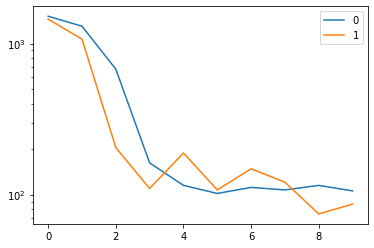

learning time: 0:00:10.605069


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=10, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'quantum_dataset.QM7b'> dataset created...
epoch: 0 of 10, train loss: 1540.022255637429, val loss: 1477.4401245117188
epoch: 1 of 10, train loss: 1298.5602971857245, val loss: 1025.5081176757812
epoch: 2 of 10, train loss: 700.7838537042791, val loss: 436.1237030029297
epoch: 3 of 10, train loss: 279.3895624334162, val loss: 155.59352111816406
epoch: 4 of 10, train loss: 154.6594342318448, val loss: 141.8625717163086
epoch: 5 of 10, train loss: 134.63091694224966, val loss: 161.49270629882812
epoch: 6 of 10, train loss: 126.2639011036266, val loss: 104.44526290893555
epoch: 7 of 10, train loss: 132.5701130953702, val loss: 138.08963775634766
epoch: 8 of 10, train loss: 113.98266358809038, val loss: 169.98629760742188
epoch: 9 of 10, train loss: 138.1606216430664, val loss: 128.14940643310547
test loss: 120.72948837280273
y_pred:
tensor([[-1797.7056],
        [-1449.2194],
        [-1921.5513],
        [-1546.7592],
        [-1584.9452],
        [-1520.5402],
        [-1715.8778

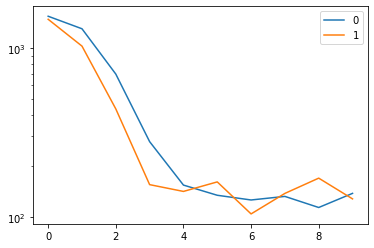

learning time: 0:00:13.382137


In [3]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=10, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
QM9 molecules scanned:  10001
QM9 molecules created:  450
QM9 molecules scanned:  20001
QM9 molecules created:  456
QM9 molecules scanned:  30001
QM9 molecules created:  678
QM9 molecules scanned:  40001
QM9 molecules created:  681
QM9 molecules scanned:  50001
QM9 molecules created:  683
QM9 molecules scanned:  60001
QM9 molecules created:  683
QM9 molecules scanned:  70001
QM9 molecules created:  683
QM9 molecules scanned:  80001
QM9 molecules created:  683
QM9 molecules scanned:  90001
QM9 molecules created:  683
QM9 molecules scanned:  100001
QM9 molecules created:  683
QM9 molecules scanned:  110001
QM9 molecules created:  683
QM9 molecules scanned:  120001
QM9 molecules created:  683
QM9 molecules scanned:  130001
QM9 molecules created:  709
total QM9 molecules created: 763
<class 'quantum_dataset.QM9'> dataset created...
epoch: 0 of 10, train loss: 214.30422250326578, val loss: 76.2429464003619
epoch: 1 

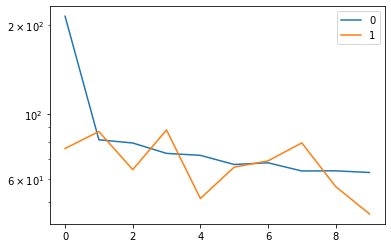

learning time: 0:03:24.812303


In [5]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 10*10, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb'], 
             'target': 'U0',
             'pad': 10, 
             'filter_on': ('n_atoms','>','10'),
             'use_pickle': False}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=4, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'quantum_dataset.ANI1x'> dataset created...
model loaded from state_dict...
loading embedding weights...
epoch: 0 of 10, train loss: 120.46577651149832, val loss: 93.28745890708095
epoch: 1 of 10, train loss: 65.4896957468738, val loss: 47.53542493461305
epoch: 2 of 10, train loss: 49.34231532662975, val loss: 50.89683331970809
epoch: 3 of 10, train loss: 46.756745415313176, val loss: 41.81337543034131
epoch: 4 of 10, train loss: 43.193887233899154, val loss: 36.026608887427344
epoch: 5 of 10, train loss: 41.514472804337004, val loss: 42.35019503791814
epoch: 6 of 10, train loss: 43.642280359511226, val loss: 63.97018142298963
epoch: 7 of 10, train loss: 46.37517568789728, val loss: 54.490749310443704
epoch: 8 of 10, train loss: 40.38369690148707, val loss: 35.11564330798504
epoch: 9 of 10, train loss: 37.841193159708666, val loss: 32.4809892708343
test loss: 42.79417742359982
y_pred:
tensor([[ -669.6509],
        [ -384.2982],
        [ -610.6732],
        [ -468.2204],
       

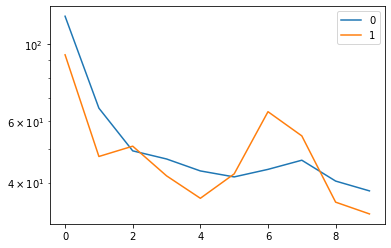

learning time: 0:00:21.972238


In [4]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 64*63+63+63+63, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': ['atomic_numbers','coordinates'],
             'targets': ['wb97x_dz.energy'],
             'embed': [(9,64,True)],
             'pad': 63, #length of the longest molecule in the dataset
             'criterion': None,
             'conformation': 'random',
             'in_file': './data/ani1/ani1x-release.h5'}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88} #deterministic train/test set selection

learn = Learn(Dataset=ANI1x, Model=FFNet, Sampler=Selector, Optimizer=Adam, 
              Criterion=L1Loss, batch_size=128, epochs=10, opt_params=opt_params, 
              model_params=model_params, ds_params=ds_params, crit_params=crit_params, 
              sample_params=sample_params, save_model=False, load_model='20201230_1317.pth',
              load_embed='20201230_1317')


mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6899
total molecular structures (idconf) mapped:  6899
<class 'quantum_dataset.QM7X'> dataset created...
epoch: 0 of 10, train loss: 70.7835894868695, val loss: 60.77579039558837
epoch: 1 of 10, train loss: 32.33084157051015, val loss: 7.959676997968197
epoch: 2 of 10, train loss: 8.083742758175964, val loss: 6.0707685197525025
epoch: 3 of 10, train loss: 6.600998938153994, val loss: 5.877606285070419
epoch: 4 of 10, train loss: 7.588214744494506, val loss: 8.489989835971354
epoch: 5 of 10, train loss: 7.1117258008183075, val loss: 10.115007520011426
epoch: 6 of 10, train loss: 6.356513719779899, v

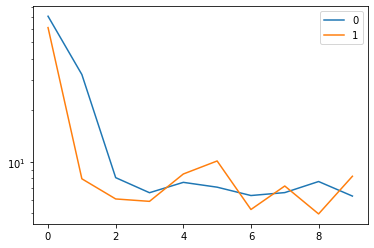

learning time: 0:03:42.776154


In [4]:
ds_params = {'features': 
                 ['DIP','HLgap','KSE','atC6','atNUM','atPOL','atXYZ', 
                 'eC','eDFTB+MBD','eEE','eH','eKIN','eKSE','eL','eMBD',
                 'eNE','eNN','ePBE0','ePBE0+MBD','eTS','eX','eXC','eXX',
                 'hCHG','hDIP','hRAT','hVDIP','hVOL','mC6','mPOL','mTPOL',
                 'pbe0FOR','sMIT','sRMSD','totFOR','vDIP','vEQ','vIQ',
                 'vTQ','vdwFOR','vdwR'],
             'pad': 1024,
             'target': ['eAT'],
             'selector': ['i1-c1-opt']}

opt_params = {'lr': 0.001}

model_params = {'D_in': 1024, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

crit_params = {'reduction': 'sum'}

sample_params = {'split': .1, 'subset': False}

Learn(Dataset=QM7X, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=256, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}
sample_params = {'split': .1, 'subset': False}

Learn(Dataset=Champs, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=True, load_model=False)

In [ ]:
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': False,
             'use_h5': False,  
             'infer': True}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20201021_2101.pth', adapt=False)